In [1]:
# Imports
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
output_filename = 'data_output'
tickers_string = 'MSFT AAPL GOOG'
tickers_array = tickers_string.split(' ')

In [3]:
tickers = yf.Tickers(tickers_string)
data = yf.download(tickers_array, period='10y', interval='1d', multi_level_index=False)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


In [4]:
# Build normal index columns from multi index columns
new_columns = []
for col in data.columns:
    new_columns.append(col[1] + '_' + col[0])

In [5]:
# Exchange to normal index columns
data.columns = new_columns

In [6]:
# Save unprocessed data
data.to_csv(output_filename+'.csv')

In [7]:
# Transform and normalize Data
data_formatted = pd.DataFrame()
data_formatted.index = data.index

for ticker in tickers_array:
    # Percentages
    data_formatted[ticker+"_close_pct"] = data[ticker+"_Close"].pct_change()
    data_formatted[ticker+"_open_pct"] = data[ticker+"_Open"].pct_change()
    data_formatted[ticker+"_high_pct"] = data[ticker+"_High"].pct_change()
    data_formatted[ticker+"_low_pct"] = data[ticker+"_Low"].pct_change()
    data_formatted[ticker+"_volume_pct"] = data[ticker+"_Volume"].pct_change()
    # Relations
    data_formatted[ticker+"_change_day_pct"] = data[ticker+"_Close"] / data[ticker+"_Open"]
    data_formatted[ticker+"_high_low_pct"] = data[ticker+"_High"] / data[ticker+"_Low"]
    data_formatted[ticker+"_open_high_pct"] = data[ticker+"_Open"] / data[ticker+"_High"]
    data_formatted[ticker+"_open_low_pct"] = data[ticker+"_Open"] / data[ticker+"_Low"]
    data_formatted[ticker+"_high_close_pct"] = data[ticker+"_High"] / data[ticker+"_Close"]
    data_formatted[ticker+"_low_close_pct"] = data[ticker+"_Low"] / data[ticker+"_Close"]
    # Overnight
    data_formatted[ticker+"_change_overnight_pct"] = data[ticker+"_Open"] / data[ticker+"_Close"].shift(1)
    #print(data[ticker+"_Close"].shift(1))

In [8]:
print(data_formatted.columns)
# Fill NaN with zero
data_formatted = data_formatted.fillna(0)

Index(['MSFT_close_pct', 'MSFT_open_pct', 'MSFT_high_pct', 'MSFT_low_pct',
       'MSFT_volume_pct', 'MSFT_change_day_pct', 'MSFT_high_low_pct',
       'MSFT_open_high_pct', 'MSFT_open_low_pct', 'MSFT_high_close_pct',
       'MSFT_low_close_pct', 'MSFT_change_overnight_pct', 'AAPL_close_pct',
       'AAPL_open_pct', 'AAPL_high_pct', 'AAPL_low_pct', 'AAPL_volume_pct',
       'AAPL_change_day_pct', 'AAPL_high_low_pct', 'AAPL_open_high_pct',
       'AAPL_open_low_pct', 'AAPL_high_close_pct', 'AAPL_low_close_pct',
       'AAPL_change_overnight_pct', 'GOOG_close_pct', 'GOOG_open_pct',
       'GOOG_high_pct', 'GOOG_low_pct', 'GOOG_volume_pct',
       'GOOG_change_day_pct', 'GOOG_high_low_pct', 'GOOG_open_high_pct',
       'GOOG_open_low_pct', 'GOOG_high_close_pct', 'GOOG_low_close_pct',
       'GOOG_change_overnight_pct'],
      dtype='object')


In [10]:
data_formatted.to_csv(output_filename+'_formatted.csv')

<Axes: xlabel='Date'>

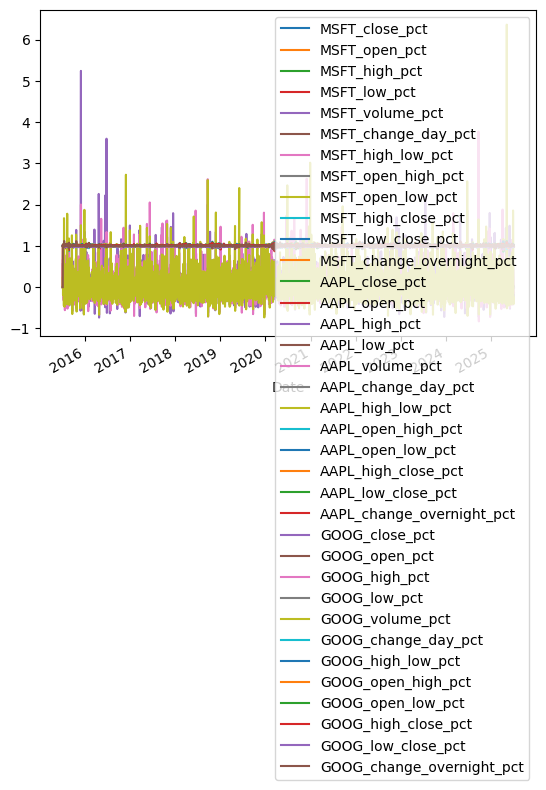

In [11]:
data_formatted.plot()